In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Graph
import seaborn as sns
import matplotlib.pyplot as plt

# Split
from sklearn.model_selection import train_test_split

# Sampling
# !pip install imblearn
from imblearn.combine import *
from imblearn.under_sampling import *
from imblearn.over_sampling import *

# Model
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Evaluation
from sklearn import metrics

print('You are doing good !')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


You are doing good !


In [ ]:
# Change Directory
import os

os.chdir('/gdrive/My Drive/Functional Data Analysis/term project')
print(os.getcwd())

/gdrive/My Drive/Functional Data Analysis/term project


In [ ]:
# Load Data
import pandas as pd

data= pd.read_csv('creditcard.csv')
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# Data Check
## 1) Duplicated cases

In [ ]:
# There are duplicated rows
no_dup= data.drop_duplicates(keep=False) # default is 'first'
data.shape[0] - no_dup.shape[0]

In [ ]:
data.groupby('Class').size()

In [ ]:
# 1 is decreased
no_dup.groupby('Class').size()

In [ ]:
print(492 / 284807)
print((492-460) / 1854)
# About 10% higher !!!

## 2) NA

In [ ]:
data.info()

In [ ]:
data.isnull().any().any()

# EDA
## 1) Destribution

In [ ]:
data.describe()
# Amount has 0 values. Maybe they are transactions of free item.

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Scaling

In [ ]:
scaler= StandardScaler(with_mean=True, with_std=True)
scaler.fit(data[['Time', 'Amount']])
data[['Time', 'Amount']]= scaler.transform(data[['Time', 'Amount']])
data[['Time', 'Amount']].describe()

,Time,Amount
count,2.848070e+05,2.848070e+05
mean,-1.050379e-14,3.202236e-16
std,1.000002e+00,1.000002e+00
min,-1.996583e+00,-3.532294e-01
25%,-8.552120e-01,-3.308401e-01
50%,-2.131453e-01,-2.652715e-01
75%,9.372174e-01,-4.471707e-02
max,1.642058e+00,1.023622e+02


Text(0.5, 1.0, 'Class distribution')

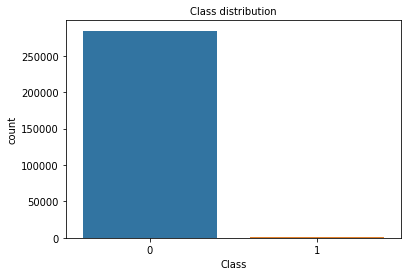

In [ ]:
# target variable
sns.countplot('Class', data=data)
plt.title('Class distribution', fontsize=10)

Text(0.5, 1.0, 'Destribution of Transaction Time')

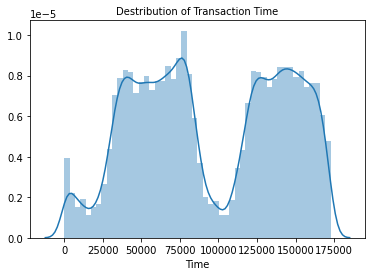

In [ ]:
# Time variable
sns.distplot(data['Time'])
plt.title('Destribution of Transaction Time', fontsize=10)

Text(0.5, 1.0, 'Destribution of Transaction Amount')

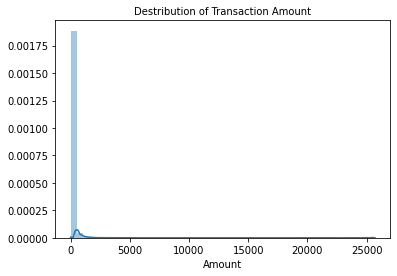

In [ ]:
# Amount variable
sns.distplot(data['Amount'])
plt.title('Destribution of Transaction Amount', fontsize=10)

### Does any variables show correlation with time?




In [ ]:
# Causion!!! It consumes a lot of time!!!
sns.pairplot(data[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'Amount', 'Time', 'Class']], hue='Class', diag_kind='kde')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
sns.pairplot(data[['V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Time', 'Class']], hue='Class', diag_kind='kde')

Output hidden; open in https://colab.research.google.com to view.

<Figure size 432x288 with 0 Axes>

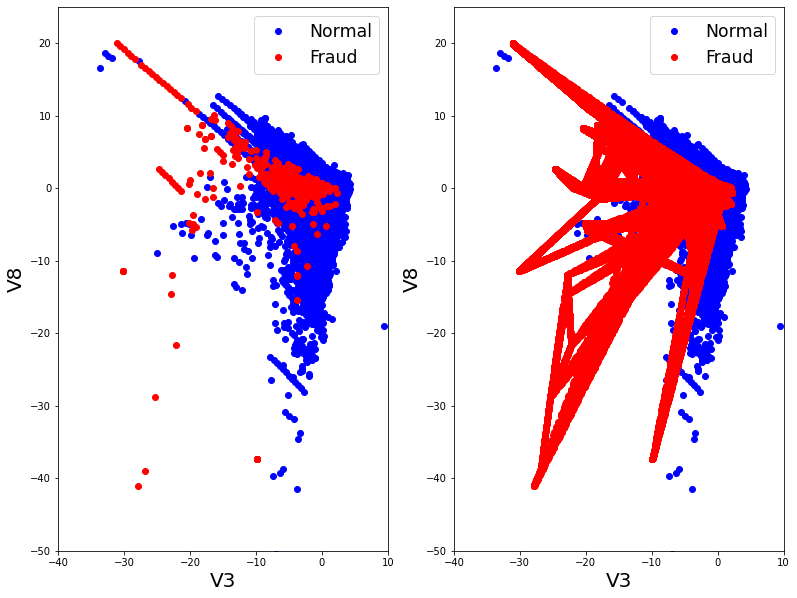

In [ ]:
plt.figure()
fig, ax= plt.subplots(1, 2, figsize=(13, 10))

plt.subplot(1,2, 1)
plt.axis([-40, 10, -50, 25])
plt.xlabel('V3', fontsize=20)
plt.ylabel('V8', fontsize=20)
plt.plot(data.loc[data['Class']==0, 'V3'], data.loc[data['Class']==0, 'V8'], 'or', color='blue', label="Normal")
plt.plot(data.loc[data['Class']==1, 'V3'], data.loc[data['Class']==1, 'V8'], 'or', color='red', label="Fraud")
plt.legend(loc='upper right', fontsize="xx-large")

plt.subplot(1,2, 2)
plt.axis([-40, 10, -50, 25])
plt.xlabel('V3', fontsize=20)
plt.ylabel('V8', fontsize=20)
plt.plot(balanced_SE.loc[balanced_SE['Class']==0, 'V3'], balanced_SE.loc[balanced_SE['Class']==0, 'V8'], 'or', color='blue', label="Normal")
plt.plot(balanced_SE.loc[balanced_SE['Class']==1, 'V3'], balanced_SE.loc[balanced_SE['Class']==1, 'V8'], 'or', color='red', label="Fraud")
plt.legend(loc='upper right', fontsize="xx-large")

#plt.savefig('SE_V3_V8')

<Figure size 432x288 with 0 Axes>

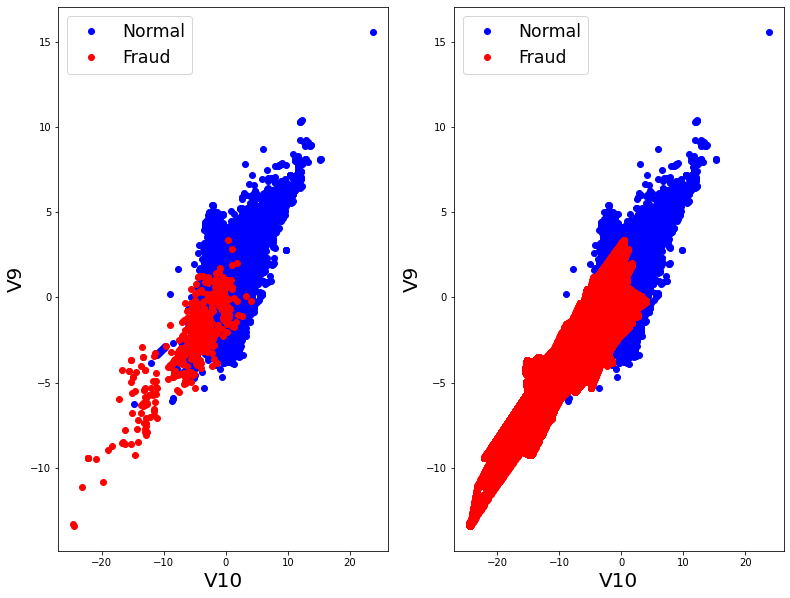

In [ ]:
plt.figure()
fig, ax= plt.subplots(1, 2, figsize=(13, 10))

plt.subplot(1,2, 1)
#plt.axis([-100, 100, -100, 100])
plt.xlabel('V10', fontsize=20)
plt.ylabel('V9', fontsize=20)
plt.plot(data.loc[data['Class']==0, 'V10'], data.loc[data['Class']==0, 'V9'], 'or', color='blue', label="Normal")
plt.plot(data.loc[data['Class']==1, 'V10'], data.loc[data['Class']==1, 'V9'], 'or', color='red', label="Fraud")
plt.legend(loc='upper left', fontsize='xx-large')

plt.subplot(1,2, 2)
#plt.axis([-100, 100, -100, 100])
plt.xlabel('V10', fontsize=20)
plt.ylabel('V9', fontsize=20)
plt.plot(balanced_ST.loc[balanced_ST['Class']==0, 'V10'], balanced_ST.loc[balanced_ST['Class']==0, 'V9'], 'or', color='blue', label="Normal")
plt.plot(balanced_ST.loc[balanced_ST['Class']==1, 'V10'], balanced_ST.loc[balanced_ST['Class']==1, 'V9'], 'or', color='red', label="Fraud")
plt.legend(loc='upper left', fontsize="xx-large")

##plt.savefig('ST_V10_V9')

## 2) Split data
Usually, the time series data should not be split randomly.
However, the Time variable shows no correlation with other variables.
Plus, each transaction is independent each other.
Which means the observation number has no meaning
So, we are going to split data randomly.

In [ ]:
train, test= train_test_split(data, train_size= 0.9, random_state=0)

print(train.shape[0], train.shape[0] / data.shape[0])
print(test.shape[0], test.shape[0] / data.shape[0])

256326 0.8999989466551033
28481 0.10000105334489671


In [ ]:
train.groupby('Class').size()

Class
0    113722
1       200
dtype: int64

In [ ]:
test.groupby('Class').size()

Class
0    85296
1      147
dtype: int64

# Balancing
## Benefits
### a) You do not have the hazard of overfitting your model 
### b) There are ML programms which make a more reliable prediction with balanced datasets, like neural networks. Interestingly it is not given for logitstic regressions.
### c) Proper Cross-Validation is not possible without a balanced dataset

## Cuasion!!!
### a) Never test on the oversampled or undersampled dataset.
### b) If we want to implement cross validation, remember to oversample or undersample your training data during cross-validation, not before!
### c) Don't use accuracy score as a metric with imbalanced datasets (will be usually high and misleading), instead use f1-score, precision/recall score or confusion matrix

## 1) SMOTE + ENN

In [ ]:
# Train data
X_samp, y_samp= SMOTEENN(random_state=0, enn= EditedNearestNeighbours(sampling_strategy='auto', n_neighbors=1)).fit_sample(train.loc[:, 'Time':'Amount'], train['Class'])

balanced_SE= pd.DataFrame(X_samp)
balanced_SE['Class']= y_samp
balanced_SE.columns= train.columns

balanced_SE.groupby(y_samp).size()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


0    255889
1    254192
dtype: int64

In [ ]:
tmp= balanced_SE.loc[:, ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'Amount', 'Time', 'Class']].sample(10000)
sns.pairplot(tmp, hue='Class', diag_kind='kde')

Output hidden; open in https://colab.research.google.com to view.

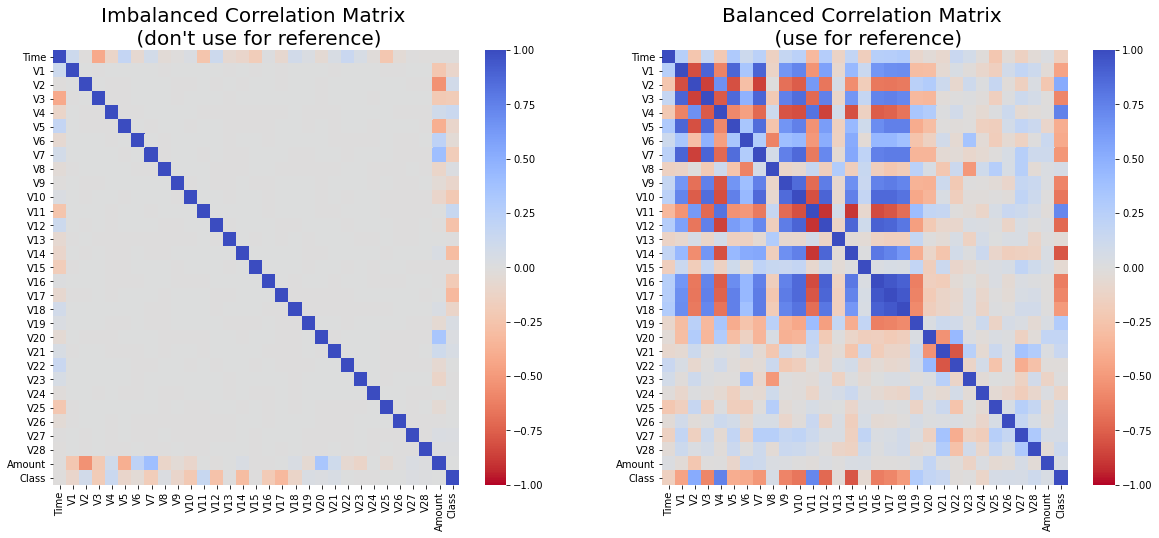

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,8))

# Entire DataFrame
corr = data.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1, vmin=-1, vmax=1) # vmin~vmax: The range of color assigned
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=20)


sub_sample_corr = balanced_SE.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2, vmin=-1, vmax=1)
ax2.set_title('Balanced Correlation Matrix \n (use for reference)', fontsize=20)

##plt.savefig('SE_Correlation')

# We have to make sure we use the subsample in our correlation matrix or else our correlation matrix will be affected by the high imbalance between our classes.
# This occurs due to the high class imbalance in the original dataframe.

# It's not a PCA!!!

# PCA
## 1) Original data

In [ ]:
# scaling for PCA
scaler= StandardScaler(with_mean=True, with_std=True)

#scaler.fit(data.loc[:, 'Time':'Amount'])
#data_scaled= scaler.transform(data.loc[:, 'Time':'Amount'])
# AT once!!!
data_scaled= scaler.fit_transform(data.loc[:, 'Time':'Amount'])

In [ ]:
pca= PCA(n_components= 2)
pc2= pca.fit_transform(data_scaled)
pc2_df= pd.DataFrame(data=pc2, columns=['PC1', 'PC2'])
pc2_df

,PC1,PC2
0,0.415148,-2.545898
1,-0.390207,-2.050195
2,1.881099,-2.517299
3,0.335709,-1.770011
4,0.001013,-1.502374
...,...,...
284802,-1.453961,1.879031
284803,-0.362609,0.854321
284804,-0.191043,2.085139
284805,-0.475192,1.207532


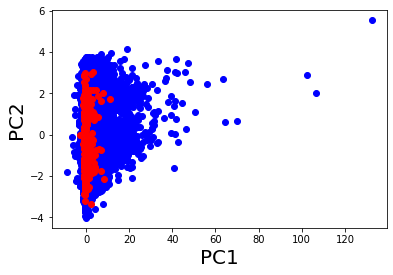

In [ ]:
plt.xlabel('PC1', fontsize=20)
plt.ylabel('PC2', fontsize=20)
plt.plot(pc2_df.loc[data['Class']==0, 'PC1'], pc2_df.loc[data['Class']==0, 'PC2'], 'or', color='blue')
plt.plot(pc2_df.loc[data['Class']==1, 'PC1'], pc2_df.loc[data['Class']==1, 'PC2'], 'or', color='red')

###plt.savefig('PCA_Original')

## 2) balanced data

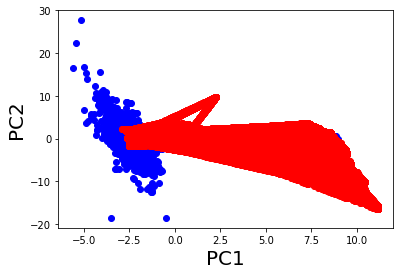

In [ ]:
scaler= StandardScaler(with_mean=True, with_std=True)
balanced_SE_scaled= scaler.fit_transform(balanced_SE.loc[:, 'Time':'Amount'])

pca= PCA(n_components= 2)
pc2_SE= pca.fit_transform(balanced_SE_scaled)
balanced_SE_pc2_df= pd.DataFrame(data=pc2_SE, columns=['PC1', 'PC2'])

plt.xlabel('PC1', fontsize=20)
plt.ylabel('PC2', fontsize=20)
plt.plot(balanced_SE_pc2_df.loc[balanced_SE['Class']==0, 'PC1'], balanced_SE_pc2_df.loc[balanced_SE['Class']==0, 'PC2'], 'or', color='blue')
plt.plot(balanced_SE_pc2_df.loc[balanced_SE['Class']==1, 'PC1'], balanced_SE_pc2_df.loc[balanced_SE['Class']==1, 'PC2'], 'or', color='red')

###plt.savefig('PCA_SE')

## 3) balanced PCA -> original data

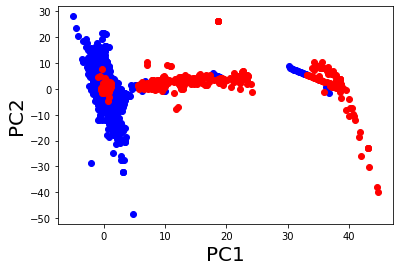

In [ ]:
pca= PCA(n_components= 2)
pca.fit(balanced_SE_scaled)
pc2_SE_original= pca.transform(data_scaled)
original_SE_pc2_df= pd.DataFrame(data=pc2_SE_original, columns=['PC1', 'PC2'])

plt.xlabel('PC1', fontsize=20)
plt.ylabel('PC2', fontsize=20)
plt.plot(original_SE_pc2_df.loc[data['Class']==0, 'PC1'], original_SE_pc2_df.loc[data['Class']==0, 'PC2'], 'or', color='blue')
plt.plot(original_SE_pc2_df.loc[data['Class']==1, 'PC1'], original_SE_pc2_df.loc[data['Class']==1, 'PC2'], 'or', color='red')
###plt.savefig('PCA_SE_Original')

<Figure size 432x288 with 0 Axes>

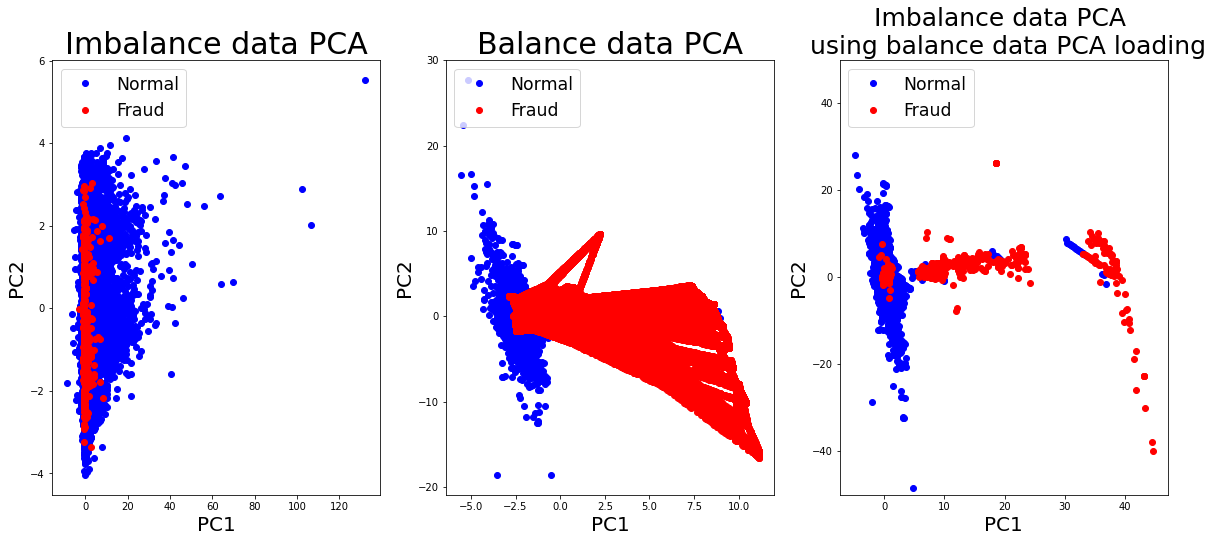

In [ ]:
plt.figure()
fig, ax= plt.subplots(1,3, figsize=(20, 8))

plt.subplot(1,3,1)
plt.xlabel('PC1', fontsize=20)
plt.ylabel('PC2', fontsize=20)
plt.title('Imbalance data PCA', fontsize=30)
plt.plot(pc2_df.loc[data['Class']==0, 'PC1'], pc2_df.loc[data['Class']==0, 'PC2'], 'or', color='blue', label="Normal")
plt.plot(pc2_df.loc[data['Class']==1, 'PC1'], pc2_df.loc[data['Class']==1, 'PC2'], 'or', color='red', label="Fraud")
plt.legend(loc='upper left', fontsize='xx-large')

plt.subplot(1,3,2)
plt.xlabel('PC1', fontsize=20)
plt.ylabel('PC2', fontsize=20)
plt.title('Balance data PCA', fontsize=30)
plt.plot(balanced_SE_pc2_df.loc[balanced_SE['Class']==0, 'PC1'], balanced_SE_pc2_df.loc[balanced_SE['Class']==0, 'PC2'], 'or', color='blue', label="Normal")
plt.plot(balanced_SE_pc2_df.loc[balanced_SE['Class']==1, 'PC1'], balanced_SE_pc2_df.loc[balanced_SE['Class']==1, 'PC2'], 'or', color='red', label="Fraud")
plt.legend(loc='upper left', fontsize='xx-large')

plt.subplot(1,3,3)
plt.xlabel('PC1', fontsize=20)
plt.ylabel('PC2', fontsize=20)
plt.title('Imbalance data PCA \n using balance data PCA loading', fontsize=25)
plt.ylim((-50, 50))
plt.plot(original_SE_pc2_df.loc[data['Class']==0, 'PC1'], original_SE_pc2_df.loc[data['Class']==0, 'PC2'], 'or', color='blue', label="Normal")
plt.plot(original_SE_pc2_df.loc[data['Class']==1, 'PC1'], original_SE_pc2_df.loc[data['Class']==1, 'PC2'], 'or', color='red', label="Fraud")
plt.legend(loc='upper left', fontsize='xx-large')

#plt.savefig('PCA')

## 2) SMOTE + Tomek

In [ ]:
# Train
X_samp, y_samp = SMOTETomek(random_state=0, tomek= TomekLinks(sampling_strategy='auto')).fit_sample(train.loc[:, 'Time':'Amount'], train['Class'])

balanced_ST= pd.DataFrame(X_samp)
balanced_ST['Class']= y_samp
balanced_ST.columns= train.columns

pd.DataFrame(X_samp).groupby(y_samp).size()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


0    255889
1    255337
dtype: int64

In [ ]:
tmp= balanced_ST.loc[:, ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'Amount', 'Time', 'Class']]
sns.pairplot(tmp, hue='Class', diag_kind='kde')

Output hidden; open in https://colab.research.google.com to view.

# Classifiers
## 1) Logistic regression

In [ ]:
X_train= train.loc[:, 'Time':'Amount'].values
y_train= train['Class'].values
X_test= test.loc[:, 'Time':'Amount'].values
y_test= test['Class'].values

In [ ]:
def logit_model(sampling='SMOTE'):
  from imblearn.pipeline import Pipeline, make_pipeline
  from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score, roc_auc_score, mean_squared_error, classification_report

  logit_param_grid= {'solver': ['lbfgs', 'saga']}
  new_params = {'logisticregression__' + key: logit_param_grid[key] for key in logit_param_grid}
  if sampling=='None':
    logit_pipeline = make_pipeline( LogisticRegression(penalty='none', random_state=1)) # l1은 solver='liblinear'

  else:
    if sampling=='SMOTE':
      samp=SMOTE(random_state=0)
    if sampling=='ADASYN':
      samp=ADASYN(random_state=0)
    if sampling=='SMOTEENN':
      samp=SMOTEENN(random_state=0)
    if sampling=='SMOTETomek':
      samp=SMOTETomek(random_state=0)
    if sampling=='TomekLinks':
      samp=TomekLinks(random_state=0)
    if sampling=='ENN':
      samp= EditedNearestNeighbours(random_state=0 ) # arg 수정 가능 
    
    logit_pipeline = make_pipeline(samp, LogisticRegression(penalty='none', random_state=1)) # l1은 solver='liblinear'
  clf_logit = GridSearchCV(logit_pipeline, param_grid=new_params, cv=5, scoring='recall',
                          return_train_score=True, n_jobs=-1, verbose=5)
  clf_logit.fit(X_train, y_train.ravel())
  print(clf_logit.best_params_)
  print(clf_logit.best_score_) # on validation set

  y_test_predict = clf_logit.predict(X_test)
  #recall on the test set
  acc_logit=accuracy_score(y_test, y_test_predict)
  precision_logit=precision_score(y_test, y_test_predict)
  recall_logit=recall_score(y_test, y_test_predict)
  f1_logit= f1_score(y_test, y_test_predict)
  rocauc_logit=roc_auc_score(y_test, y_test_predict)
  mse_logit= mean_squared_error(y_test, y_test_predict)
  print('---' * 45)
  print('')
  print("accuracy: {}".format(acc_logit))
  print("precision: {}".format(precision_logit))
  print("recall: {}".format(recall_logit))
  print("f1: {}".format(f1_logit))
  print("Roc Auc Score:",rocauc_logit)
  print("MSE:",mse_logit)
  print('---' * 45)


  labels = ['No Fraud', 'Fraud']
  print(classification_report(y_test, y_test_predict , target_names=labels))

In [ ]:
logit_model(sampling='None')

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  4.9min finished
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


{'logisticregression__C': 0.1, 'logisticregression__solver': 'lbfgs'}
0.6202898550724638
---------------------------------------------------------------------------------------------------------------------------------------

accuracy: 0.999204147794436
precision: 0.883495145631068
recall: 0.6190476190476191
f1: 0.728
Roc Auc Score: 0.8094534662486266
MSE: 0.0007958522055639433
---------------------------------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

    No Fraud       1.00      1.00      1.00     85296
       Fraud       0.88      0.62      0.73       147

    accuracy                           1.00     85443
   macro avg       0.94      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
logit_model()

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.5min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.5min finished
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


{'logisticregression__solver': 'saga'}
0.9043478260869566
---------------------------------------------------------------------------------------------------------------------------------------

accuracy: 0.9754807298432874
precision: 0.06086564472497746
recall: 0.9183673469387755
f1: 0.11416490486257928
Roc Auc Score: 0.9469732532855573
MSE: 0.024519270156712663
---------------------------------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

    No Fraud       1.00      0.98      0.99     85296
       Fraud       0.06      0.92      0.11       147

    accuracy                           0.98     85443
   macro avg       0.53      0.95      0.55     85443
weighted avg       1.00      0.98      0.99     85443



In [ ]:
logit_model(sampling='ADASYN')

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 13.1min finished
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


{'logisticregression__C': 0.1, 'logisticregression__solver': 'lbfgs'}
0.927536231884058
---------------------------------------------------------------------------------------------------------------------------------------

accuracy: 0.915838629261613
precision: 0.018983884184649004
recall: 0.9455782312925171
f1: 0.03722051144731557
Roc Auc Score: 0.9306828035096988
MSE: 0.08416137073838699
---------------------------------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

    No Fraud       1.00      0.92      0.96     85296
       Fraud       0.02      0.95      0.04       147

    accuracy                           0.92     85443
   macro avg       0.51      0.93      0.50     85443
weighted avg       1.00      0.92      0.95     85443



In [ ]:
logit_model(sampling='TomekLinks')

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 22.7min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 22.7min finished
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


{'logisticregression__solver': 'lbfgs'}
0.6260869565217392
---------------------------------------------------------------------------------------------------------------------------------------

accuracy: 0.9992158515033414
precision: 0.8846153846153846
recall: 0.6258503401360545
f1: 0.7330677290836654
Roc Auc Score: 0.8128548267928443
MSE: 0.0007841484966585911
---------------------------------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

    No Fraud       1.00      1.00      1.00     85296
       Fraud       0.88      0.63      0.73       147

    accuracy                           1.00     85443
   macro avg       0.94      0.81      0.87     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
logit_model(sampling='ENN')

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 35.8min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 35.8min finished
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


{'logisticregression__solver': 'lbfgs'}
0.6695652173913043
---------------------------------------------------------------------------------------------------------------------------------------

accuracy: 0.9992626663389628
precision: 0.8818181818181818
recall: 0.6598639455782312
f1: 0.754863813229572
Roc Auc Score: 0.8298557675743342
MSE: 0.0007373336610371826
---------------------------------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

    No Fraud       1.00      1.00      1.00     85296
       Fraud       0.88      0.66      0.75       147

    accuracy                           1.00     85443
   macro avg       0.94      0.83      0.88     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
logit_model(sampling='SMOTEENN')

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed: 73.4min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 305.7min finished
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-package

{'logisticregression__C': 0.1, 'logisticregression__solver': 'saga'}
0.9043478260869566
---------------------------------------------------------------------------------------------------------------------------------------

accuracy: 0.9745444331308591
precision: 0.0587467362924282
recall: 0.9183673469387755
f1: 0.11042944785276074
Roc Auc Score: 0.9465042981176713
MSE: 0.02545556686914083
---------------------------------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

    No Fraud       1.00      0.97      0.99     85296
       Fraud       0.06      0.92      0.11       147

    accuracy                           0.97     85443
   macro avg       0.53      0.95      0.55     85443
weighted avg       1.00      0.97      0.99     85443



In [ ]:
logit_model(sampling='SMOTETomek')

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 25.9min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 25.9min finished
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


{'logisticregression__solver': 'saga'}
0.9043478260869566
---------------------------------------------------------------------------------------------------------------------------------------

accuracy: 0.9754807298432874
precision: 0.06086564472497746
recall: 0.9183673469387755
f1: 0.11416490486257928
Roc Auc Score: 0.9469732532855573
MSE: 0.024519270156712663
---------------------------------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

    No Fraud       1.00      0.98      0.99     85296
       Fraud       0.06      0.92      0.11       147

    accuracy                           0.98     85443
   macro avg       0.53      0.95      0.55     85443
weighted avg       1.00      0.98      0.99     85443



## 2) LASSO


In [ ]:
def lasso_model(sampling='SMOTE'):
  from imblearn.pipeline import Pipeline, make_pipeline
  from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score, roc_auc_score, mean_squared_error, classification_report

  lasso_param_grid= {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
  new_params = {'logisticregression__' + key: lasso_param_grid[key] for key in lasso_param_grid}
  if sampling=='None':
    lasso_pipeline = make_pipeline( LogisticRegression(penalty='l2',random_state=1)) # l1은 solver='liblinear'

  else:
    if sampling=='SMOTE':
      samp=SMOTE(random_state=0)
    if sampling=='ADASYN':
      samp=ADASYN(random_state=0)
    if sampling=='SMOTEENN':
      samp=SMOTEENN(random_state=0)
    if sampling=='SMOTETomek':
      samp=SMOTETomek(random_state=0)
    if sampling=='TomekLinks':
      samp=TomekLinks(random_state=0)
    if sampling=='ENN':
      samp= EditedNearestNeighbours(random_state=0 ) # arg 수정 가능 
    
    lasso_pipeline = make_pipeline(samp, LogisticRegression(penalty='l2',random_state=1)) # l1은 solver='liblinear'
  clf_lasso = GridSearchCV(lasso_pipeline, param_grid=new_params, cv=5, scoring='recall',
                          return_train_score=True, n_jobs=-1, verbose=5)
  clf_lasso.fit(X_train, y_train.ravel())
  print(clf_lasso.best_params_)
  print(clf_lasso.best_score_) # on validation set

  y_test_predict = clf_lasso.predict(X_test)
  #recall on the test set
  acc_lasso=accuracy_score(y_test, y_test_predict)
  precision_lasso=precision_score(y_test, y_test_predict)
  recall_lasso=recall_score(y_test, y_test_predict)
  f1_lasso= f1_score(y_test, y_test_predict)
  rocauc_lasso=roc_auc_score(y_test, y_test_predict)
  mse_lasso= mean_squared_error(y_test, y_test_predict)
  print('---' * 45)
  print('')
  print("accuracy: {}".format(acc_lasso))
  print("precision: {}".format(precision_lasso))
  print("recall: {}".format(recall_lasso))
  print("f1: {}".format(f1_lasso))
  print("Roc Auc Score:",rocauc_lasso)
  print("MSE:",mse_lasso)
  print('---' * 45)


  labels = ['No Fraud', 'Fraud']
  print(classification_report(y_test, y_test_predict , target_names=labels))


lasso_model()

## 3) Ridge



## 4) LDA


In [ ]:
def logit_model(sampling='SMOTE'):
  from imblearn.pipeline import Pipeline, make_pipeline
  from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score, roc_auc_score, mean_squared_error, classification_report

  if sampling=='None':
    logit_pipeline = make_pipeline( LinearDiscriminantAnalysis())

  else:
    if sampling=='SMOTE':
      samp=SMOTE(random_state=0)
    if sampling=='ADASYN':
      samp=ADASYN(random_state=0)
    if sampling=='SMOTEENN':
      samp=SMOTEENN(random_state=0)
    if sampling=='SMOTETomek':
      samp=SMOTETomek(random_state=0)
    if sampling=='TomekLinks':
      samp=TomekLinks(random_state=0)
    if sampling=='ENN':
      samp= EditedNearestNeighbours(random_state=0 ) # arg 수정 가능 
    
    logit_pipeline = make_pipeline(samp, LinearDiscriminantAnalysis())

  logit_pipeline.fit(X_train, y_train.ravel())

  y_test_predict = logit_pipeline.predict(X_test)
  #recall on the test set
  acc_logit=accuracy_score(y_test, y_test_predict)
  precision_logit=precision_score(y_test, y_test_predict)
  recall_logit=recall_score(y_test, y_test_predict)
  f1_logit= f1_score(y_test, y_test_predict)
  rocauc_logit=roc_auc_score(y_test, y_test_predict)
  mse_logit= mean_squared_error(y_test, y_test_predict)
  print('---' * 45)
  print('')
  print("accuracy: {}".format(acc_logit))
  print("precision: {}".format(precision_logit))
  print("recall: {}".format(recall_logit))
  print("f1: {}".format(f1_logit))
  print("Roc Auc Score:",rocauc_logit)
  print("MSE:",mse_logit)
  print('---' * 45)


  labels = ['No Fraud', 'Fraud']
  print(classification_report(y_test, y_test_predict , target_names=labels))

In [ ]:
logit_model(sampling='None')

---------------------------------------------------------------------------------------------------------------------------------------

accuracy: 0.9993914071369217
precision: 0.88
recall: 0.7482993197278912
f1: 0.8088235294117648
Roc Auc Score: 0.874061730769967
MSE: 0.0006085928630783095
---------------------------------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

    No Fraud       1.00      1.00      1.00     85296
       Fraud       0.88      0.75      0.81       147

    accuracy                           1.00     85443
   macro avg       0.94      0.87      0.90     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
logit_model(sampling='TomekLinks')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


---------------------------------------------------------------------------------------------------------------------------------------

accuracy: 0.9993914071369217
precision: 0.88
recall: 0.7482993197278912
f1: 0.8088235294117648
Roc Auc Score: 0.874061730769967
MSE: 0.0006085928630783095
---------------------------------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

    No Fraud       1.00      1.00      1.00     85296
       Fraud       0.88      0.75      0.81       147

    accuracy                           1.00     85443
   macro avg       0.94      0.87      0.90     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
logit_model(sampling='ENN')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


---------------------------------------------------------------------------------------------------------------------------------------

accuracy: 0.9993914071369217
precision: 0.88
recall: 0.7482993197278912
f1: 0.8088235294117648
Roc Auc Score: 0.874061730769967
MSE: 0.0006085928630783095
---------------------------------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

    No Fraud       1.00      1.00      1.00     85296
       Fraud       0.88      0.75      0.81       147

    accuracy                           1.00     85443
   macro avg       0.94      0.87      0.90     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
logit_model()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


---------------------------------------------------------------------------------------------------------------------------------------

accuracy: 0.9884016244747961
precision: 0.1099815157116451
recall: 0.8095238095238095
f1: 0.19365337672904803
Roc Auc Score: 0.8991168569284776
MSE: 0.011598375525203937
---------------------------------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

    No Fraud       1.00      0.99      0.99     85296
       Fraud       0.11      0.81      0.19       147

    accuracy                           0.99     85443
   macro avg       0.55      0.90      0.59     85443
weighted avg       1.00      0.99      0.99     85443



In [ ]:
logit_model(sampling='ADASYN')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


---------------------------------------------------------------------------------------------------------------------------------------

accuracy: 0.9110635160282293
precision: 0.01773233238415739
recall: 0.9319727891156463
f1: 0.03480248952114823
Roc Auc Score: 0.9215001349442421
MSE: 0.08893648397177066
---------------------------------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

    No Fraud       1.00      0.91      0.95     85296
       Fraud       0.02      0.93      0.03       147

    accuracy                           0.91     85443
   macro avg       0.51      0.92      0.49     85443
weighted avg       1.00      0.91      0.95     85443



In [ ]:
logit_model(sampling='SMOTETomek')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


---------------------------------------------------------------------------------------------------------------------------------------

accuracy: 0.9884016244747961
precision: 0.1099815157116451
recall: 0.8095238095238095
f1: 0.19365337672904803
Roc Auc Score: 0.8991168569284776
MSE: 0.011598375525203937
---------------------------------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

    No Fraud       1.00      0.99      0.99     85296
       Fraud       0.11      0.81      0.19       147

    accuracy                           0.99     85443
   macro avg       0.55      0.90      0.59     85443
weighted avg       1.00      0.99      0.99     85443



In [ ]:
logit_model(sampling='SMOTEENN')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

---------------------------------------------------------------------------------------------------------------------------------------

accuracy: 0.9882728836768372
precision: 0.10887465690759378
recall: 0.8095238095238095
f1: 0.19193548387096773
Roc Auc Score: 0.8990523755928933
MSE: 0.01172711632316281
---------------------------------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

    No Fraud       1.00      0.99      0.99     85296
       Fraud       0.11      0.81      0.19       147

    accuracy                           0.99     85443
   macro avg       0.55      0.90      0.59     85443
weighted avg       1.00      0.99      0.99     85443



## 5) QDA

In [ ]:
def qda_model(sampling='SMOTE'):
  from imblearn.pipeline import Pipeline, make_pipeline
  from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score, roc_auc_score, mean_squared_error, classification_report

  if sampling=='None':
    logit_pipeline = make_pipeline(QuadraticDiscriminantAnalysis())

  else:
    if sampling=='SMOTE':
      samp=SMOTE(random_state=0)
    if sampling=='ADASYN':
      samp=ADASYN(random_state=0)
    if sampling=='SMOTEENN':
      samp=SMOTEENN(random_state=0)
    if sampling=='SMOTETomek':
      samp=SMOTETomek(random_state=0)
    if sampling=='TomekLinks':
      samp=TomekLinks(random_state=0)
    if sampling=='ENN':
      samp= EditedNearestNeighbours(random_state=0 ) # arg 수정 가능 
    
    logit_pipeline = make_pipeline(samp, QuadraticDiscriminantAnalysis())

  logit_pipeline.fit(X_train, y_train.ravel())

  y_test_predict = logit_pipeline.predict(X_test)
  #recall on the test set
  acc_logit=accuracy_score(y_test, y_test_predict)
  precision_logit=precision_score(y_test, y_test_predict)
  recall_logit=recall_score(y_test, y_test_predict)
  f1_logit= f1_score(y_test, y_test_predict)
  rocauc_logit=roc_auc_score(y_test, y_test_predict)
  mse_logit= mean_squared_error(y_test, y_test_predict)
  print('---' * 45)
  print('')
  print("accuracy: {}".format(acc_logit))
  print("precision: {}".format(precision_logit))
  print("recall: {}".format(recall_logit))
  print("f1: {}".format(f1_logit))
  print("Roc Auc Score:",rocauc_logit)
  print("MSE:",mse_logit)
  print('---' * 45)


  labels = ['No Fraud', 'Fraud']
  print(classification_report(y_test, y_test_predict , target_names=labels))

In [ ]:
qda_model(sampling='None')

---------------------------------------------------------------------------------------------------------------------------------------

accuracy: 0.9774937677750078
precision: 0.0621301775147929
recall: 0.8571428571428571
f1: 0.11586206896551723
Roc Auc Score: 0.9174220194549402
MSE: 0.0225062322249921
---------------------------------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

    No Fraud       1.00      0.98      0.99     85296
       Fraud       0.06      0.86      0.12       147

    accuracy                           0.98     85443
   macro avg       0.53      0.92      0.55     85443
weighted avg       1.00      0.98      0.99     85443



In [ ]:
qda_model(sampling='TomekLinks')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


---------------------------------------------------------------------------------------------------------------------------------------

accuracy: 0.9774937677750078
precision: 0.0621301775147929
recall: 0.8571428571428571
f1: 0.11586206896551723
Roc Auc Score: 0.9174220194549402
MSE: 0.0225062322249921
---------------------------------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

    No Fraud       1.00      0.98      0.99     85296
       Fraud       0.06      0.86      0.12       147

    accuracy                           0.98     85443
   macro avg       0.53      0.92      0.55     85443
weighted avg       1.00      0.98      0.99     85443



In [ ]:
qda_model(sampling='ENN')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


---------------------------------------------------------------------------------------------------------------------------------------

accuracy: 0.9776342122818721
precision: 0.0625
recall: 0.8571428571428571
f1: 0.11650485436893204
Roc Auc Score: 0.917492362730123
MSE: 0.022365787718127875
---------------------------------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

    No Fraud       1.00      0.98      0.99     85296
       Fraud       0.06      0.86      0.12       147

    accuracy                           0.98     85443
   macro avg       0.53      0.92      0.55     85443
weighted avg       1.00      0.98      0.99     85443



In [ ]:
qda_model()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


---------------------------------------------------------------------------------------------------------------------------------------

accuracy: 0.974673173928818
precision: 0.05592250110083664
recall: 0.8639455782312925
f1: 0.10504549214226634
Roc Auc Score: 0.9194047906163026
MSE: 0.025326826071181956
---------------------------------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

    No Fraud       1.00      0.97      0.99     85296
       Fraud       0.06      0.86      0.11       147

    accuracy                           0.97     85443
   macro avg       0.53      0.92      0.55     85443
weighted avg       1.00      0.97      0.99     85443



In [ ]:
qda_model(sampling='ADASYN')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


---------------------------------------------------------------------------------------------------------------------------------------

accuracy: 0.9628641316433177
precision: 0.04012158054711246
recall: 0.8979591836734694
f1: 0.07681117253418679
Roc Auc Score: 0.9304675865844368
MSE: 0.037135868356682235
---------------------------------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

    No Fraud       1.00      0.96      0.98     85296
       Fraud       0.04      0.90      0.08       147

    accuracy                           0.96     85443
   macro avg       0.52      0.93      0.53     85443
weighted avg       1.00      0.96      0.98     85443



In [ ]:
qda_model(sampling='SMOTEENN')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

---------------------------------------------------------------------------------------------------------------------------------------

accuracy: 0.9747550998911555
precision: 0.05609540636042403
recall: 0.8639455782312925
f1: 0.10535047698050604
Roc Auc Score: 0.9194458241934927
MSE: 0.025244900108844493
---------------------------------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

    No Fraud       1.00      0.97      0.99     85296
       Fraud       0.06      0.86      0.11       147

    accuracy                           0.97     85443
   macro avg       0.53      0.92      0.55     85443
weighted avg       1.00      0.97      0.99     85443



In [ ]:
qda_model(sampling='SMOTETomek')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


---------------------------------------------------------------------------------------------------------------------------------------

accuracy: 0.974673173928818
precision: 0.05592250110083664
recall: 0.8639455782312925
f1: 0.10504549214226634
Roc Auc Score: 0.9194047906163026
MSE: 0.025326826071181956
---------------------------------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

    No Fraud       1.00      0.97      0.99     85296
       Fraud       0.06      0.86      0.11       147

    accuracy                           0.97     85443
   macro avg       0.53      0.92      0.55     85443
weighted avg       1.00      0.97      0.99     85443



## 6) Random forest


In [ ]:
def rf_model(sampling='SMOTE'):
  from imblearn.pipeline import Pipeline, make_pipeline
  from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score, roc_auc_score, mean_squared_error, classification_report
  rf_param_grid= {
      "n_estimators": [10, 50, 100], 
      #"criterion": ["gini", "entropy"],
      "max_features": ["auto", "log2"], 
      "max_depth": [10,50,100], 
      "min_samples_split": [3, 5, 10],
      "min_samples_leaf": [5, 10, 20]
  }
  new_params = {'randomforestclassifier__' + key: rf_param_grid[key] for key in rf_param_grid}
  
  if sampling=='SMOTE':
    samp=SMOTE(random_state=0)
  if sampling=='ADASYN':
    samp=ADASYN(random_state=0)
  if sampling=='SMOTEENN':
    samp=SMOTEENN(random_state=0)
  if sampling=='SMOTETomek':
    samp=SMOTETomek(random_state=0)
  if sampling=='TomekLinks':
    samp=TomekLinks(random_state=0)
  if sampling=='ENN':
    samp= EditedNearestNeighbours(random_state=0 ) # arg 수정 가능 

  rf_pipeline = make_pipeline(samp, RandomForestClassifier( random_state=1))
  clf_rf = GridSearchCV(rf_pipeline, param_grid=new_params, cv=5, scoring='recall',
                          return_train_score=True, n_jobs=-1, verbose=5)
  clf_rf.fit(X_train, y_train.ravel())
  clf_rf.best_params_
  clf_rf.best_score_ # on validation set

  y_test_predict = clf_rf.predict(X_test)
  #recall on the test set
  acc_rf=accuracy_score(y_test, y_test_predict)
  precision_rf=precision_score(y_test, y_test_predict)
  recall_rf=recall_score(y_test, y_test_predict)
  f1_rf= f1_score(y_test, y_test_predict)
  rocauc_rf=roc_auc_score(y_test, y_test_predict)
  mse_rf= mean_squared_error(y_test, y_test_predict)
  print('---' * 45)
  print('')
  print("accuracy: {}".format(acc_rf))
  print("precision: {}".format(precision_rf))
  print("recall: {}".format(recall_rf))
  print("f1: {}".format(f1_rf))
  print("Roc Auc Score:",rocauc_rf)
  print("MSE:",mse_rf)
  print('---' * 45)


  labels = ['No Fraud', 'Fraud']
  print(classification_report(y_test, y_test_predict , target_names=labels))

## 7) SVM

In [ ]:
def svm_model(sampling='SMOTE'):
  from imblearn.pipeline import Pipeline, make_pipeline
  from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score, roc_auc_score, mean_squared_error, classification_report
  from imblearn.combine import SMOTETomek, SMOTEENN

  svm_param_grid= {'kernel': ['rbf','poly'],#, 'sigmoid'], 
                    'gamma': [1e-2,  1e-4], 'C': [1,10]}
  new_params = {'svc__' + key: svm_param_grid[key] for key in svm_param_grid}
  
  if sampling=='None':
    svm_pipeline = make_pipeline(SVC(random_state=1)) # l1은 solver='liblinear'

  else:
    if sampling=='SMOTE':
      samp=SMOTE(random_state=0)
    if sampling=='ADASYN':
      samp=ADASYN(random_state=0)
    if sampling=='SMOTEENN':
      samp=SMOTEENN(random_state=0)
    if sampling=='SMOTETomek':
      samp=SMOTETomek(random_state=0)
    if sampling=='TomekLinks':
      samp=TomekLinks(random_state=0)
    if sampling=='ENN':
      samp= EditedNearestNeighbours(random_state=0 ) # arg 수정 가능 

    svm_pipeline = make_pipeline(samp, SVC(random_state=1))
  clf_svm = GridSearchCV(svm_pipeline, param_grid=new_params, cv=3, scoring='recall',
                          return_train_score=True, n_jobs=-1, verbose=5)
  clf_svm.fit(X_train, y_train.ravel())
  print(clf_svm.best_params_)
  print(clf_svm.best_score_) # on validation set

  y_test_predict = clf_svm.predict(X_test)
  #recall on the test set
  acc_svm=accuracy_score(y_test, y_test_predict)
  precision_svm=precision_score(y_test, y_test_predict)
  recall_svm=recall_score(y_test, y_test_predict)
  f1_svm= f1_score(y_test, y_test_predict)
  rocauc_svm=roc_auc_score(y_test, y_test_predict)
  mse_svm= mean_squared_error(y_test, y_test_predict)
  print('---' * 45)
  print('')
  print("accuracy: {}".format(acc_svm))
  print("precision: {}".format(precision_svm))
  print("recall: {}".format(recall_svm))
  print("f1: {}".format(f1_svm))
  print("Roc Auc Score:",rocauc_svm)
  print("MSE:",mse_svm)
  print('---' * 45)


  labels = ['No Fraud', 'Fraud']
  print(classification_report(y_test, y_test_predict , target_names=labels))

In [ ]:
svm_model(sampling='SMOTEENN')

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


## 8) XGBoosting

In [ ]:
def xgb_model(sampling='SMOTE'):
  from imblearn.pipeline import Pipeline, make_pipeline
  from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score, roc_auc_score, mean_squared_error, classification_report

  xgb_param_grid= {'max_depth': [3, 4],
                   'learning_rate': [0.1, 0.5],
                   'reg_lambda': [1, 10]}

  new_params = {'xgbclassifier__' + key: xgb_param_grid[key] for key in xgb_param_grid}
  if sampling=='None':
    xgb_pipeline = make_pipeline( XGBClassifier(n_estimators=200, objective='binary:logistic', random_state=0)) # l1은 solver='liblinear'

  else:
    if sampling=='SMOTE':
      samp=SMOTE(random_state=0)
    if sampling=='ADASYN':
      samp=ADASYN(random_state=0)
    if sampling=='SMOTEENN':
      samp=SMOTEENN(random_state=0)
    if sampling=='SMOTETomek':
      samp=SMOTETomek(random_state=0)
    if sampling=='TomekLinks':
      samp=TomekLinks(random_state=0)
    if sampling=='ENN':
      samp= EditedNearestNeighbours(random_state=0 ) # arg 수정 가능 
    xgb_pipeline = make_pipeline(samp, XGBClassifier(n_estimators=200, objective='binary:logistic', random_state=0)) 
  clf_xgb = GridSearchCV(xgb_pipeline, param_grid=new_params, cv=5, scoring='recall',
                          return_train_score=True, n_jobs=-1, verbose=5)
  clf_xgb.fit(X_train, y_train.ravel())
  print(clf_xgb.best_params_)
  print(clf_xgb.best_score_) # on validation set

  y_test_predict = clf_xgb.predict(X_test)
  #recall on the test set
  acc_xgb=accuracy_score(y_test, y_test_predict)
  precision_xgb=precision_score(y_test, y_test_predict)
  recall_xgb=recall_score(y_test, y_test_predict)
  f1_xgb= f1_score(y_test, y_test_predict)
  rocauc_xgb=roc_auc_score(y_test, y_test_predict)
  mse_xgb= mean_squared_error(y_test, y_test_predict)
  print('---' * 45)
  print('')
  print("accuracy: {}".format(acc_xgb))
  print("precision: {}".format(precision_xgb))
  print("recall: {}".format(recall_xgb))
  print("f1: {}".format(f1_xgb))
  print("Roc Auc Score:",rocauc_xgb)
  print("MSE:",mse_xgb)
  print('---' * 45)


  labels = ['No Fraud', 'Fraud']
  print(classification_report(y_test, y_test_predict , target_names=labels))

In [ ]:
xgb_model()

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed: 37.5min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 111.3min finished
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


{'xgbclassifier__learning_rate': 0.1, 'xgbclassifier__max_depth': 3, 'xgbclassifier__reg_lambda': 10}
0.8782608695652174
---------------------------------------------------------------------------------------------------------------------------------------

accuracy: 0.9948620717905504
precision: 0.2326007326007326
recall: 0.8639455782312925
f1: 0.3665223665223666
Roc Auc Score: 0.9295166364238435
MSE: 0.005137928209449575
---------------------------------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

    No Fraud       1.00      1.00      1.00     85296
       Fraud       0.23      0.86      0.37       147

    accuracy                           0.99     85443
   macro avg       0.62      0.93      0.68     85443
weighted avg       1.00      0.99      1.00     85443



In [ ]:
xgb_model(sampling="ADASYN")

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed: 31.3min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 103.1min finished
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


{'xgbclassifier__learning_rate': 0.1, 'xgbclassifier__max_depth': 3, 'xgbclassifier__reg_lambda': 10}
0.8956521739130434
---------------------------------------------------------------------------------------------------------------------------------------

accuracy: 0.9867982163547628
precision: 0.10475423045930701
recall: 0.8843537414965986
f1: 0.1873198847262248
Roc Auc Score: 0.9356642558542834
MSE: 0.013201783645237176
---------------------------------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

    No Fraud       1.00      0.99      0.99     85296
       Fraud       0.10      0.88      0.19       147

    accuracy                           0.99     85443
   macro avg       0.55      0.94      0.59     85443
weighted avg       1.00      0.99      0.99     85443



In [ ]:
xgb_model(sampling="SMOTEENN")

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed: 108.7min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 270.3min finished
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packag

{'xgbclassifier__learning_rate': 0.1, 'xgbclassifier__max_depth': 3, 'xgbclassifier__reg_lambda': 10}
0.881159420289855
---------------------------------------------------------------------------------------------------------------------------------------

accuracy: 0.994616293903538
precision: 0.22495606326889278
recall: 0.8707482993197279
f1: 0.35754189944134074
Roc Auc Score: 0.9327890342968926
MSE: 0.005383706096461969
---------------------------------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

    No Fraud       1.00      0.99      1.00     85296
       Fraud       0.22      0.87      0.36       147

    accuracy                           0.99     85443
   macro avg       0.61      0.93      0.68     85443
weighted avg       1.00      0.99      1.00     85443



In [ ]:
xgb_model(sampling="SMOTETomek")

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed: 74.3min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 221.4min finished
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


{'xgbclassifier__learning_rate': 0.1, 'xgbclassifier__max_depth': 3, 'xgbclassifier__reg_lambda': 10}
0.8782608695652174
---------------------------------------------------------------------------------------------------------------------------------------

accuracy: 0.9948620717905504
precision: 0.2326007326007326
recall: 0.8639455782312925
f1: 0.3665223665223666
Roc Auc Score: 0.9295166364238435
MSE: 0.005137928209449575
---------------------------------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

    No Fraud       1.00      1.00      1.00     85296
       Fraud       0.23      0.86      0.37       147

    accuracy                           0.99     85443
   macro avg       0.62      0.93      0.68     85443
weighted avg       1.00      0.99      1.00     85443



In [ ]:
xgb_model(sampling="ENN")

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed: 78.6min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 223.8min finished
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


{'xgbclassifier__learning_rate': 0.5, 'xgbclassifier__max_depth': 3, 'xgbclassifier__reg_lambda': 10}
0.8173913043478261
---------------------------------------------------------------------------------------------------------------------------------------

accuracy: 0.9995435553526912
precision: 0.8913043478260869
recall: 0.8367346938775511
f1: 0.8631578947368421
Roc Auc Score: 0.9182794178447969
MSE: 0.00045644464730873214
---------------------------------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

    No Fraud       1.00      1.00      1.00     85296
       Fraud       0.89      0.84      0.86       147

    accuracy                           1.00     85443
   macro avg       0.95      0.92      0.93     85443
weighted avg       1.00      1.00      1.00     85443

